## Modelado Predictivo:

* ¿Podemos predecir la popularidad de una canción basándonos en atributos como la duración, la explicitud y el país de origen del artista o alguna otra variable?


In [24]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import session_info

In [25]:
df = pd.read_csv("/home/roy/Proyectos de Ciencia de Datos/data/Top_10K_Spotify_Clean.csv")
df.head()

,Album_Type,Artist_Name,Artist_Song_Rank,Track_Name,Is_Playable,Album_Name,Release_Date,Total_Album_Tracks,Is_Explicit,Song_Duration,...,Track_Popularity,Gender,Age,Country,Genres,Artist_Popularity,Followers,Year,Month,Day
0,album,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,260,...,93,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2023,10,6
1,album,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,247,...,91,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2023,10,6
2,album,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06,23,True,319,...,89,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2023,10,6
3,album,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17,14,True,218,...,89,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2022,6,17
4,album,Drake,5,One Dance,True,Views,2016-05-06,20,False,173,...,89,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2016,5,6


## Vision general del Dataset

In [26]:
df.columns # Columnas del dataset

Index(['Album_Type', 'Artist_Name', 'Artist_Song_Rank', 'Track_Name',
       'Is_Playable', 'Album_Name', 'Release_Date', 'Total_Album_Tracks',
       'Is_Explicit', 'Song_Duration', 'Track_Number', 'Track_Popularity',
       'Gender', 'Age', 'Country', 'Genres', 'Artist_Popularity', 'Followers',
       'Year', 'Month', 'Day'],
      dtype='object')

In [27]:
df.dtypes.value_counts()# Tipos de datos

int64     11
object     8
bool       2
Name: count, dtype: int64

In [28]:
df.shape # temenos 18 columnas y mas de 370000 filas

(37146, 21)

In [29]:
df.describe(include="number") # Descripción de las columnas numéricas

,Artist_Song_Rank,Total_Album_Tracks,Song_Duration,Track_Number,Track_Popularity,Age,Artist_Popularity,Followers,Year,Month,Day
count,37146.000000,37146.000000,37146.000000,37146.000000,37146.000000,37146.000000,37146.000000,3.714600e+04,37146.000000,37146.000000,37146.000000
mean,5.495154,11.168928,208.519221,4.933506,69.151726,25.444247,72.883971,1.183155e+07,2018.101276,6.809158,15.155145
std,2.871303,8.524758,67.500287,5.595928,13.086567,12.642374,9.884456,1.673654e+07,5.879723,3.490873,9.154801
min,1.000000,1.000000,100.000000,1.000000,0.000000,0.000000,4.000000,4.080000e+02,1964.000000,1.000000,1.000000
25%,3.000000,1.000000,174.000000,1.000000,63.000000,21.000000,67.000000,2.165489e+06,2017.000000,4.000000,7.000000
50%,5.000000,12.000000,200.000000,3.000000,71.000000,27.000000,74.000000,6.377463e+06,2019.000000,7.000000,15.000000
75%,8.000000,16.000000,228.000000,7.000000,78.000000,32.000000,79.000000,1.245295e+07,2022.000000,10.000000,23.000000
max,10.000000,165.000000,992.000000,164.000000,99.000000,59.000000,100.000000,1.159989e+08,2023.000000,12.000000,31.000000


In [30]:
df.describe(include="object") # Descripción de las columnas de texto

,Album_Type,Artist_Name,Track_Name,Album_Name,Release_Date,Gender,Country,Genres
count,37146,37146,37146,37146,37146,37146,37146,37146
unique,3,404,3580,2499,1150,4,31,307
top,album,Drake,Champions,nadie sabe lo que va a pasar mañana,2023-10-13,male,US,['pop']
freq,24775,100,46,115,403,24572,12670,1770


# Preparativos

In [31]:
df_explicit = df.drop(columns=['Track_Name','Album_Name','Is_Playable']) # eliminamos las columnas que no nos interesan, eliminalas is playable porque solo tiene un valor 'True'

## codificacion 

In [32]:
df_explicit['Is_Explicit'] = df_explicit['Is_Explicit'].astype(int) # convertimos la columna a tipo entero para poder graficarla 
# convertimos la columna a tipo entero para poder graficarla
df_explicit['Gender'] = df_explicit['Gender'].map({'male': 0, 'female': 1, 'mixed': 2, 'other': 3}) 
df_explicit['Album_Type'] = df_explicit['Album_Type'].map({'album': 0, 'single': 1, 'compilation': 2})

In [33]:
df_explicit.head(2)

,Album_Type,Artist_Name,Artist_Song_Rank,Release_Date,Total_Album_Tracks,Is_Explicit,Song_Duration,Track_Number,Track_Popularity,Gender,Age,Country,Genres,Artist_Popularity,Followers,Year,Month,Day
0,0,Drake,1,2023-10-06,23,1,260,7,93,0,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2023,10,6
1,0,Drake,2,2023-10-06,23,1,247,6,91,0,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,2023,10,6


## Verificamos si hay valores nulos y que tipo de valores son 

In [34]:
df_explicit.dtypes

Album_Type             int64
Artist_Name           object
Artist_Song_Rank       int64
Release_Date          object
Total_Album_Tracks     int64
Is_Explicit            int64
Song_Duration          int64
Track_Number           int64
Track_Popularity       int64
Gender                 int64
Age                    int64
Country               object
Genres                object
Artist_Popularity      int64
Followers              int64
Year                   int64
Month                  int64
Day                    int64
dtype: object

In [35]:
df_explicit.isnull().sum() # no hay valores nulos

Album_Type            0
Artist_Name           0
Artist_Song_Rank      0
Release_Date          0
Total_Album_Tracks    0
Is_Explicit           0
Song_Duration         0
Track_Number          0
Track_Popularity      0
Gender                0
Age                   0
Country               0
Genres                0
Artist_Popularity     0
Followers             0
Year                  0
Month                 0
Day                   0
dtype: int64

## Analisis unidimensional de las variables

In [36]:
df_explicit.dtypes.value_counts() # Tipos de datos 

int64     14
object     4
Name: count, dtype: int64

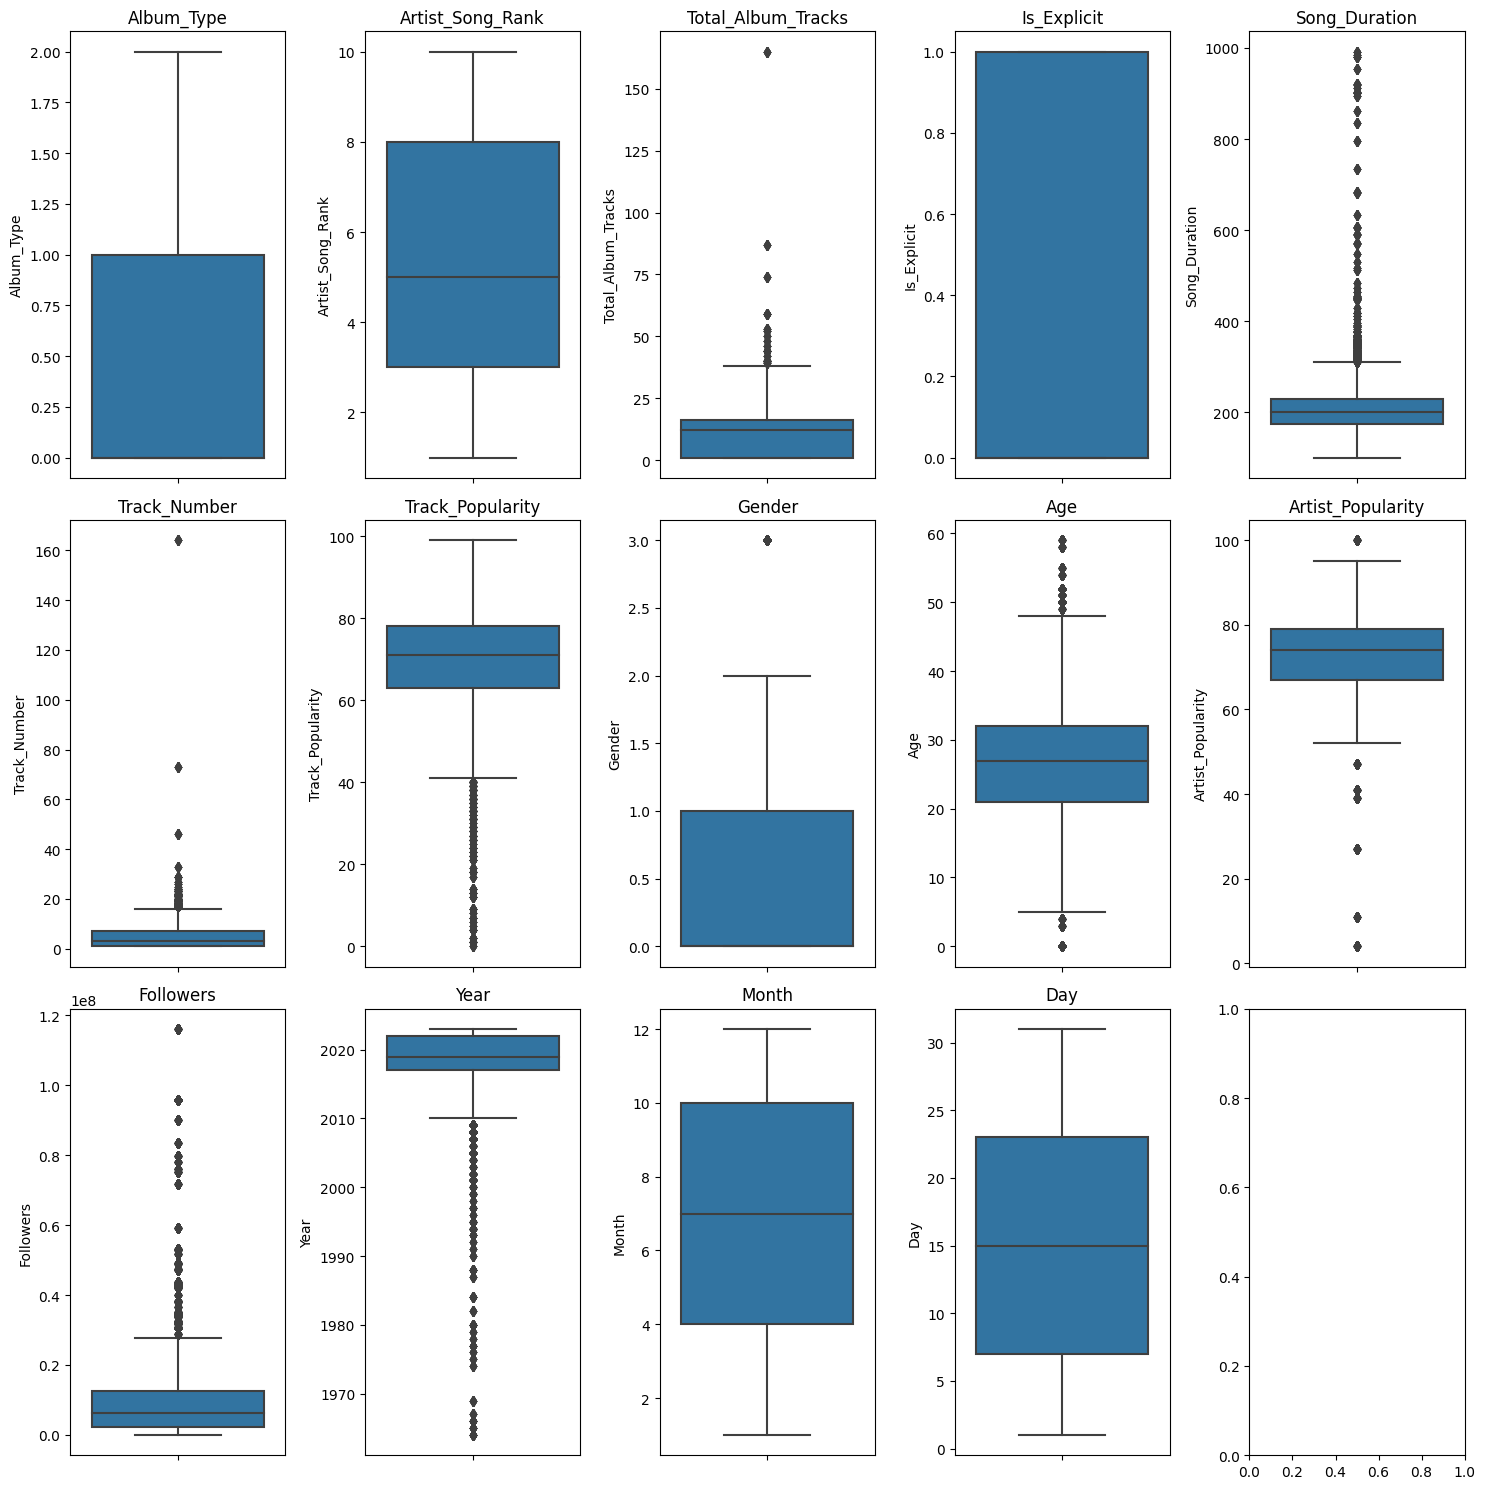

In [37]:
int_cols = df_explicit.select_dtypes(exclude='object').columns
num_plots = len(int_cols)
rows = 3  # Número de filas deseadas
cols = num_plots // rows + (num_plots % rows > 0)  # Número de columnas deseadas

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Ajusta el tamaño de la figura según tus necesidades

for i, col in enumerate(int_cols):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Obtén el eje correspondiente
    sns.boxplot(data=df_explicit, y=col, ax=ax)
    ax.set_title(col)  # Opcional: establece el título de cada gráfico

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()
    

<AxesSubplot:>

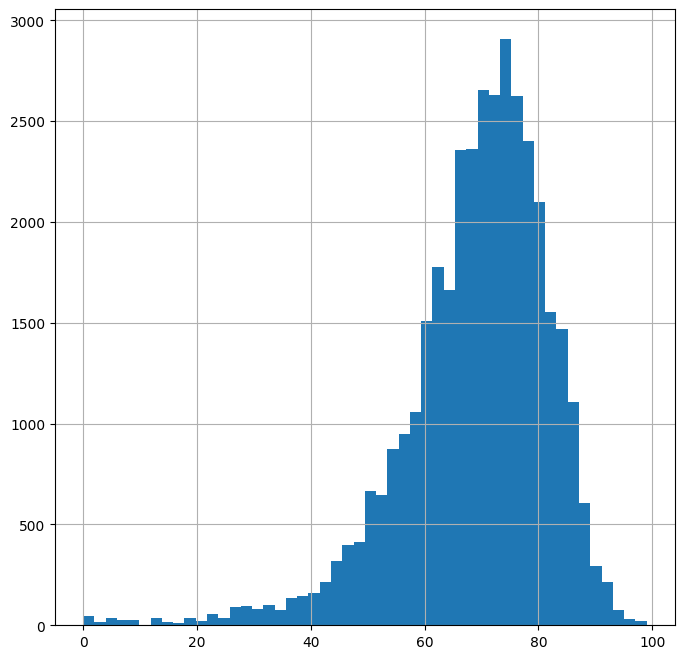

In [38]:
df_explicit.Track_Popularity.hist(bins=50, figsize=(8, 8)) # histograma de la variable Track_Popularity

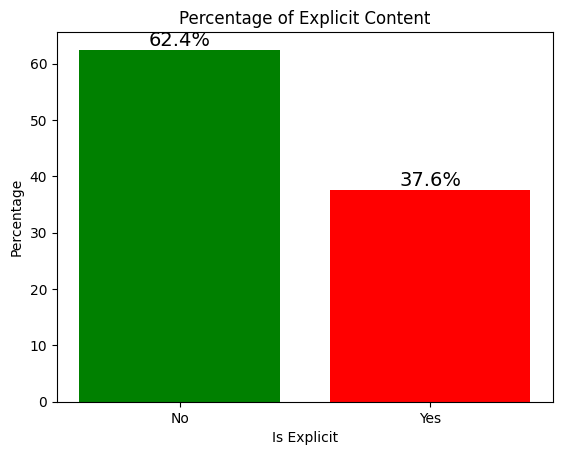

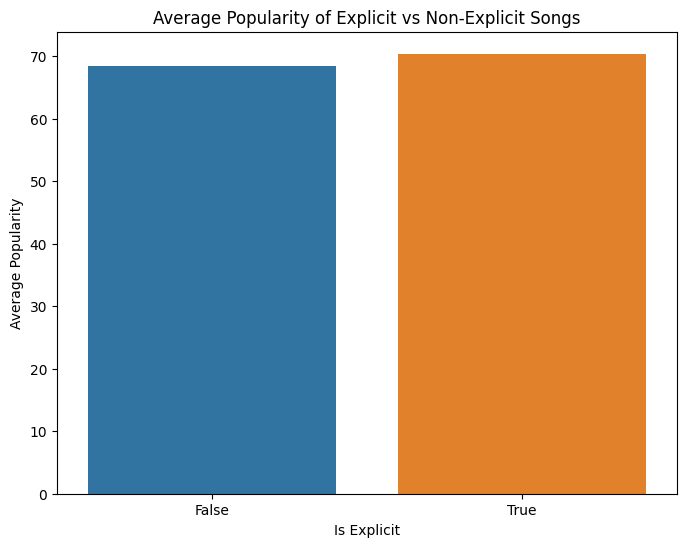

In [39]:
# Define las categorías y el orden en el que deben aparecer en el gráfico
categories = ['No', 'Yes']

# Define los colores para cada categoría
colors = ['green', 'red','blue','yellow']  

# Calcula el número de observaciones para cada categoría
value_counts = df_explicit['Is_Explicit'].value_counts(normalize=True) * 100

# Crea el gráfico de barras con Matplotlib
fig, ax = plt.subplots()
bars = ax.bar(categories, value_counts, color=colors)

# Etiquetas
[ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.1f}%'.format(value),
        ha='center', va='bottom', fontsize=14, color='black') for bar, value in zip(bars, value_counts)]
ax.set(xlabel="Is Explicit", ylabel="Percentage", title="Percentage of Explicit Content")
ax.set_xticks(range(len(categories)))  # Asegura que las marcas en el eje x coincidan con las categorías
ax.set_xticklabels(categories)  # Reemplaza con los nombres reales de las categorías si son diferentes

# Grafico de la media de popularidad de las canciones explicitas y no explicitas
df_explicit_nonexplicit = df[['Is_Explicit', 'Track_Popularity']]
average_popularity = df_explicit_nonexplicit.groupby('Is_Explicit')['Track_Popularity'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_popularity.index, y=average_popularity.values)
plt.xlabel('Is Explicit')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Explicit vs Non-Explicit Songs')
plt.show()


plt.show()


## Analisis multidimensional de las variables

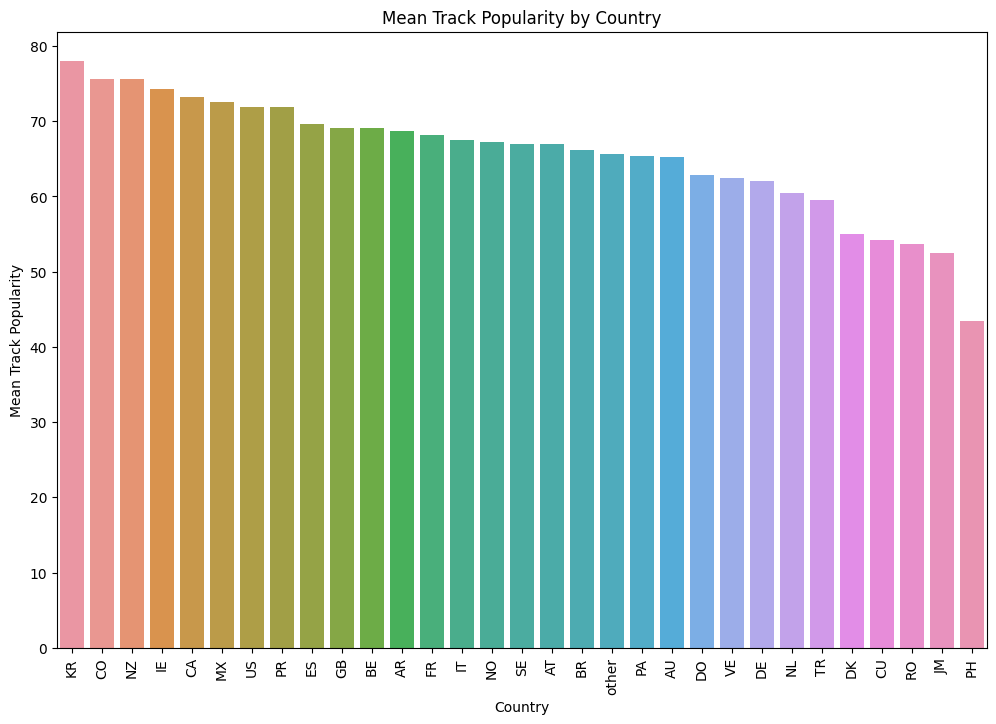

In [47]:
# Grafico de la media de popularidad de las canciones por pais
df_popularity_Country = df[['Country', 'Track_Popularity']]

table_Track_Popularity_Country = pd.pivot_table(df_popularity_Country, values='Track_Popularity', index='Country', aggfunc='mean')

table_Track_Popularity_Country = table_Track_Popularity_Country.sort_values(by='Track_Popularity', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=table_Track_Popularity_Country.index, y=table_Track_Popularity_Country['Track_Popularity'])
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.xlabel('Country')
plt.ylabel('Mean Track Popularity')
plt.title('Mean Track Popularity by Country')
plt.show()



/tmp/ipykernel_18694/1612561056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_popularity_songduration['Is_Explicit'] = df_popularity_songduration['Is_Explicit'].astype(str)


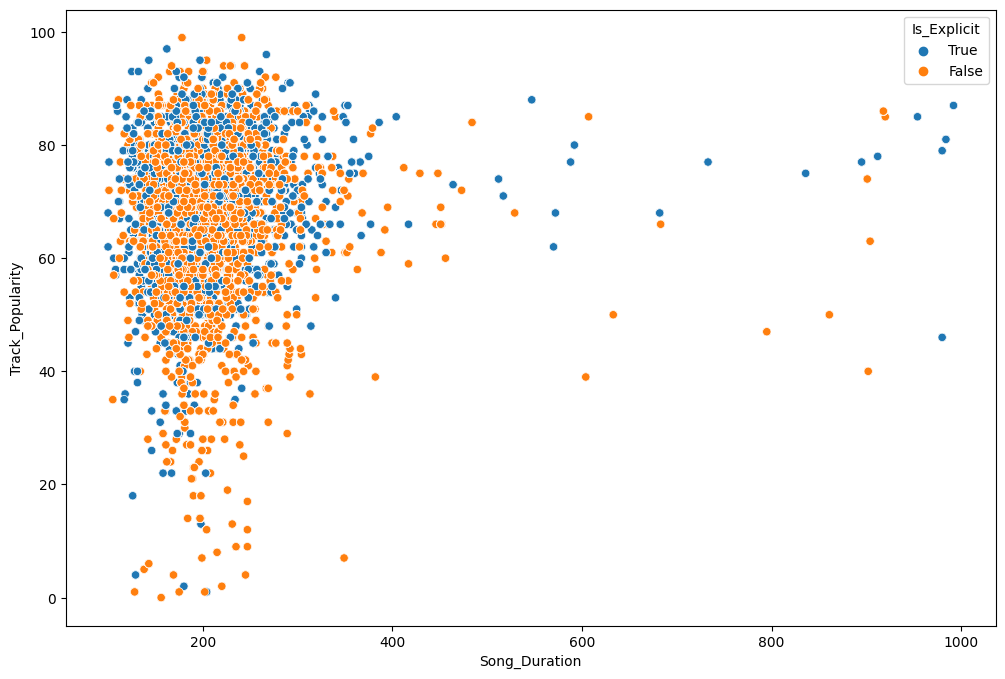

In [48]:
# Grafico de la media de popularidad de la duracion de las canciones vs Track_Popularity
if 'Is_Explicit' in df.columns:
    df_popularity_songduration = df[['Track_Popularity', 'Song_Duration', 'Is_Explicit']]
    
    df_popularity_songduration['Is_Explicit'] = df_popularity_songduration['Is_Explicit'].astype(str)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Song_Duration', y='Track_Popularity', hue='Is_Explicit', data=df_popularity_songduration)
    plt.show()
else:
    print("Column 'Is_Explicit' does not exist in the dataframe.")


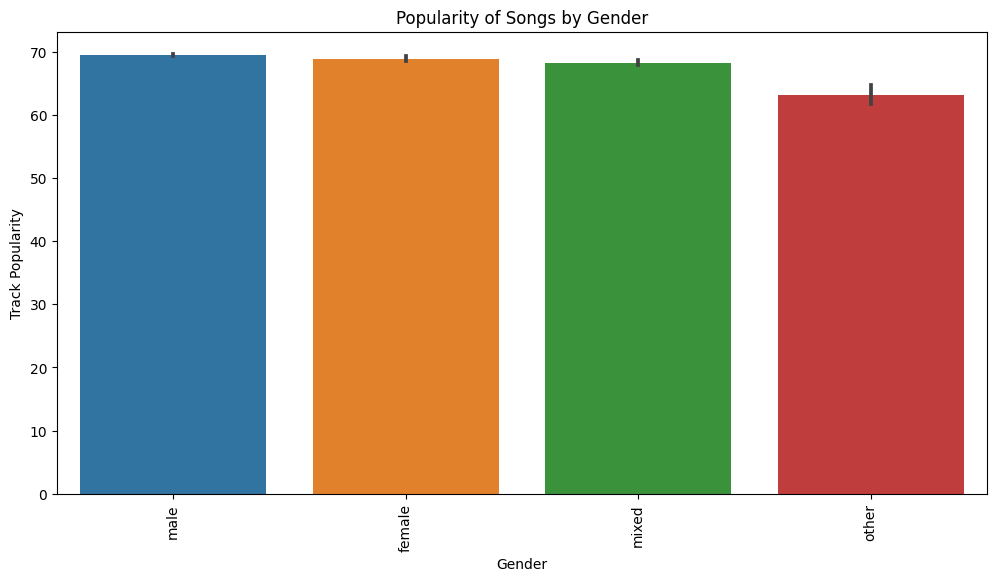

In [49]:

# grafico de popularidad de las canciones por genero
df_popularity_genre = df[['Gender', 'Track_Popularity']]

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Track_Popularity', data=df_popularity_genre)
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Track Popularity')
plt.title('Popularity of Songs by Gender')
plt.show()


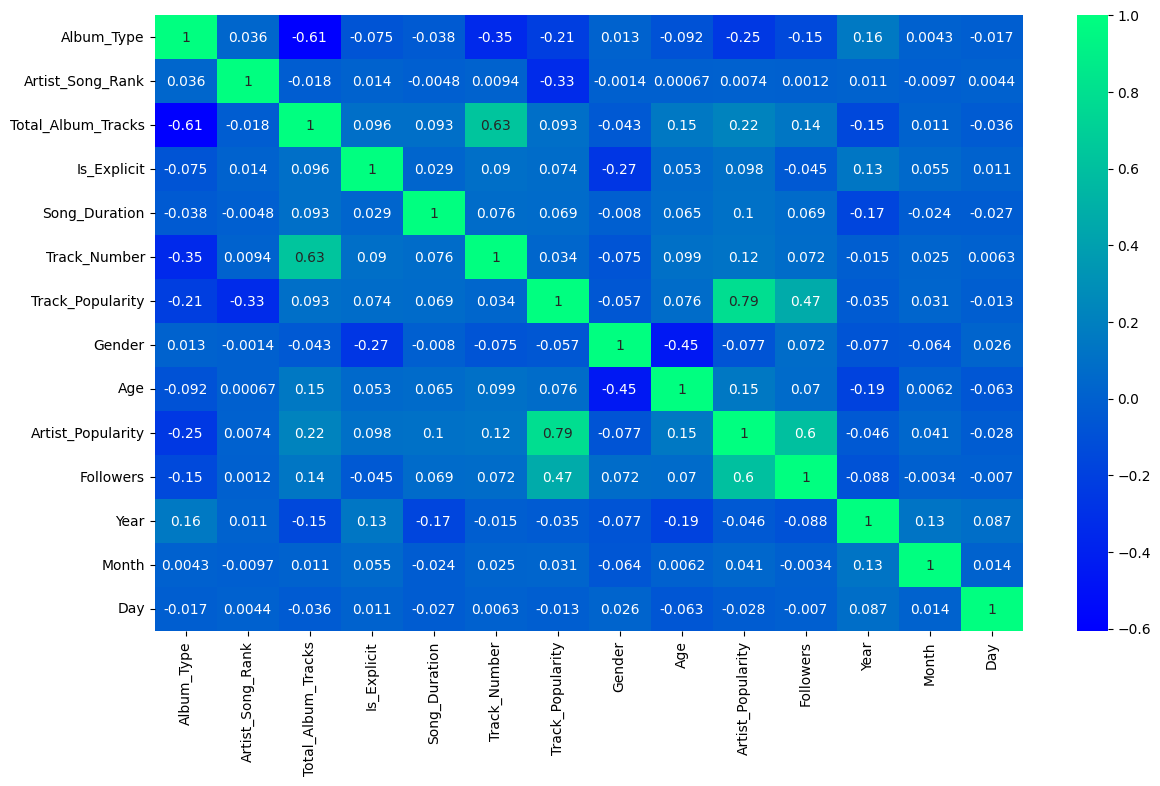

In [43]:
# grafico de corelacion entre las variables numericas
df_explicit_numeric = df_explicit.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14,8))
sns.heatmap(df_explicit_numeric.corr(), annot=True, cmap="winter")
plt.show()

## Analisis de texto

In [44]:
# creamos una lista que contenga todos los generos para hacer un wordcloud
genre_list = df_explicit['Genres'].unique().tolist()
genre_list = [genre.replace("'", "").strip("[]") for genre in genre_list]
genre_list = list(set(genre_list))
genre_list = [genre.replace("'", "").replace(", ", ",") for genre in genre_list]
print(genre_list)

['', 'dance pop,miami hip hop,pop', 'chicago rap,hip hop,rap', 'emo,modern rock,pop,rock', 'piano rock,viral pop', 'atl hip hop,hip hop,rap', 'detroit hip hop,hip hop,rap', 'dance pop,edm,electro house,moombahton,pop dance', 'latin pop,puerto rican pop', 'contemporary country,country', 'basshall,pop urbaine,r&b francais', 'atl hip hop,atl trap,gangster rap,melodic rap,rap,trap', 'crunk,memphis hip hop,pop rap,rap,southern hip hop,trap', 'indie rock,indietronica,modern alternative rock,modern rock', 'german hip hop,swedish hip hop', 'pop rap,rap,trap', 'atl hip hop,plugg,pluggnb,rage rap,rap', 'latin pop,latin viral pop,mexican pop,reggaeton', 'deep euro house,deep house,edm,german dance,pop dance,tropical house', 'hip hop,pop rap', 'canadian pop,pop', 'dance pop,latin pop,mexican pop', 'pop dance,tropical house', 'agronejo,arrocha,pop nacional,sertanejo,sertanejo universitario', 'reggaeton,trap argentino,trap latino,urbano latino', 'brostep,complextro,edm,electro,pop dance', 'grime,uk 

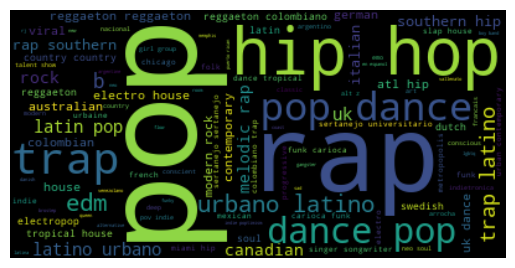

In [45]:
# creamos el wordcloud con la lista de palabras de los generos
text = ' '.join(genre_list)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
session_info.show()